## 📘 문제 1 : 가설점정  

빵 카페를 운영하는 사장님은 “케이크를 구매하는 고객이 구매하지 않는 고객보다 평균적으로 더 많은 매출을 올릴 것”이라는 가설을 세웠습니다. 이를 확인하기 위해 지난 주말 방문객 중 100명을 무작위로 추출하여 데이터를 수집했습니다.

**집단 1 케이크 구매자 40명 : 평균 결제 금액 5만원, 표준 편차 3천원**       
**집단 2  케이크 미구매자 60명 : 평균 결제 금액 1만원, 표준편차 2천원**

유의수준 5%에서 사장님의 가설이 타당한지 검정하세요.


In [8]:
# 코드를 작성하세요

import numpy as np

# 1. 데이터 입력 (문제 1의 수치)
n_1, mean_a, std_1 = 40, 50000, 3000   # 집단 1: 케이크 구매자
n_2, mean_b, std_2 = 60, 10000, 2000   # 집단 2: 케이크 미구매자

# 2. 합동 표준편차 (s) 계산
pooled_var = ((n_1 - 1) * (std_1**2) + (n_2 - 1) * (std_2**2)) / (n_1 + n_2 - 2)
s = np.sqrt(pooled_var)

# 3. 오차 한계 (Margin of Error) 계산
margin_of_error = 2 * s * np.sqrt((1/n_1) + (1/n_2))

# 4. 신뢰구간 (Confidence Interval) 계산
diff_mean = mean_a - mean_b
ci_lower = diff_mean - margin_of_error
ci_upper = diff_mean + margin_of_error

# 5. 결과 출력 및 가설 검정
print(f"--- 구간검정 결과 ---")
print(f"표본 평균의 차이: {diff_mean}원")
print(f"합동 표준편차(s): {s}")
print(f"오차 한계: {margin_of_error}원")
print(f"95% 신뢰구간: [{ci_lower:,.1f}, {ci_upper:,.1f}]")

print(f"\n--- 가설 검정 결론 ---")
if ci_lower <= 0 <= ci_upper:
    print("결과: 신뢰구간 안에 '0'이 포함됩니다.")
    print("결론: 귀무가설을 채택합니다. 매출 차이가 우연일 수 있습니다.")
else:
    print("결과: 신뢰구간 안에 '0'이 포함되지 않습니다.")
    print("결론: 귀무가설을 기각합니다. 케이크 구매자의 매출이 통계적으로 유의미하게 높습니다.")

--- 구간검정 결과 ---
표본 평균의 차이: 40000원
합동 표준편차(s): 2447.4059570016875
오차 한계: 999.1492980170136원
95% 신뢰구간: [39,000.9, 40,999.1]

--- 가설 검정 결론 ---
결과: 신뢰구간 안에 '0'이 포함되지 않습니다.
결론: 귀무가설을 기각합니다. 케이크 구매자의 매출이 통계적으로 유의미하게 높습니다.


## 📘 문제 2 : 중심극한정리

A 배달 앱은 데이터 분석을 통해 위 빵가게의 배달 도착 시간이 모평균 32분, 모표준편차 10분이라는 사실을 알게 되었습니다. 360건을 무작위 추출하였을 때 표본평균과 표준오차를 구하고, 어떤 그래프 모양일지 시각화해주세요.

In [ ]:
# 코드를 작성하세요

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. 문제 조건 설정
mu = 32          # 모평균
sigma = 10       # 모표준편차
n = 360          # 표본 크기

# 2. 표준오차(Standard Error) 계산
standard_error = sigma / np.sqrt(n)

print(f"표준오차(SE): {standard_error}")



표준오차(SE): 0.5270462766947299


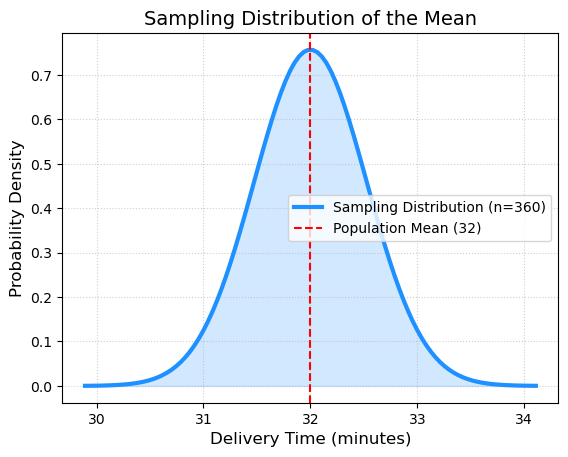

In [ ]:
# 3. 시각화
x = np.linspace(mu - 4*standard_error, mu + 4*standard_error, 100)
y = stats.norm.pdf(x, mu, standard_error)

plt.plot(x, y, color='dodgerblue', lw=3, label=f'Sampling Distribution (n={n})')
plt.fill_between(x, y, color='dodgerblue', alpha=0.2)

plt.axvline(mu, color='red', linestyle='--', label=f'Population Mean ({mu})')
plt.title('Sampling Distribution of the Mean', fontsize=14)
plt.xlabel('Delivery Time (minutes)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.savefig('정규분포 그래프')